In [ ]:
#surprise package for SVD
conda install -c conda-forge scikit-surprise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined_data_1.txt",header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
df.shape

(24058263, 2)

In [4]:
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [5]:
df.tail(10)

,Cust_Id,Rating
24058253,272857,4.0
24058254,185372,1.0
24058255,2219917,3.0
24058256,1796454,1.0
24058257,2562830,4.0
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [6]:
df.sample(10)

,Cust_Id,Rating
17082275,1014995,3.0
20759410,1813197,4.0
18565454,1980593,3.0
3613383,359063,5.0
2831131,1368446,4.0
21422987,781833,4.0
13176554,621274,3.0
1083476,1915821,5.0
15858446,1565175,3.0
14564657,905573,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [8]:
df['Rating'] = df['Rating'].astype(float)

In [9]:
#Total movie id's
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [10]:
movie_count = df.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

4499

In [11]:
#to claculate how many customers we are having in the dataset
customer_count=(df['Cust_Id'].nunique()) - (movie_count)
customer_count

470758

In [12]:
# count of ratings
rating_count = (df['Cust_Id'].count()) - (movie_count)

rating_count

24053764

In [13]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


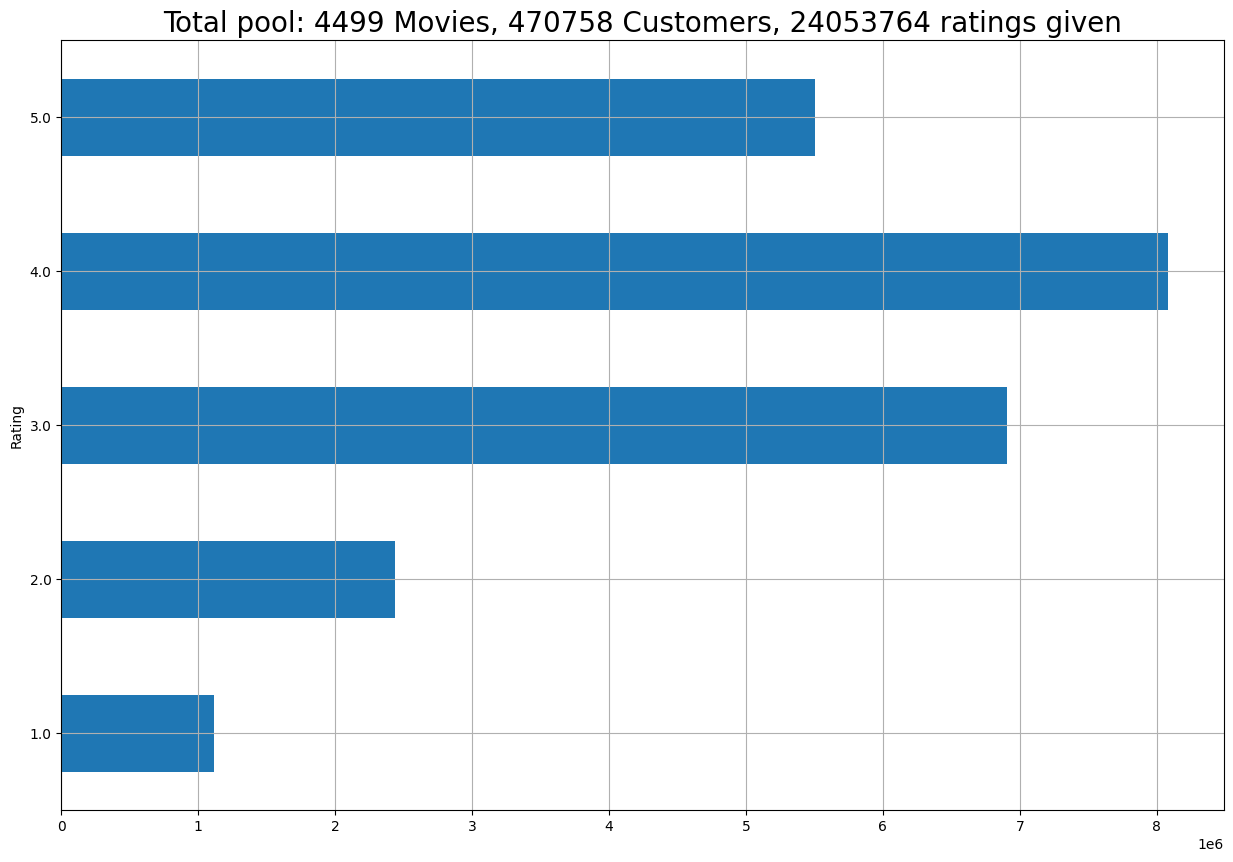

In [14]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [15]:
# 1st approach for calculating null values and creating a data frame
#df_nan=pd.DataFrame(pd.isnull(df.Rating))
#df_nan

In [16]:
#df_nan=df[df_nan['Rating']==True].reset_index()

In [17]:
# 2nd approach calculating null values and creating a data frame
df_nan = df[df['Rating'].isnull()].reset_index()
df_nan

,index,Cust_Id,Rating
0,0,1:,NaN
1,548,2:,NaN
2,694,3:,NaN
3,2707,4:,NaN
4,2850,5:,NaN
...,...,...,...
4494,24046714,4495:,NaN
4495,24047329,4496:,NaN
4496,24056849,4497:,NaN
4497,24057564,4498:,NaN


In [18]:
#lag_values = df_nan['index'].shift(1,fill_value=0)
#lag_values

In [19]:
df_nan['lag_values'] = df_nan['index'].shift(1,fill_value=0)

In [20]:
df_nan

,index,Cust_Id,Rating,lag_values
0,0,1:,NaN,0
1,548,2:,NaN,0
2,694,3:,NaN,548
3,2707,4:,NaN,694
4,2850,5:,NaN,2707
...,...,...,...,...
4494,24046714,4495:,NaN,24046583
4495,24047329,4496:,NaN,24046714
4496,24056849,4497:,NaN,24047329
4497,24057564,4498:,NaN,24056849


In [21]:
movie_id_list =[]
movie_id = 1
for i in range(1,len(df_nan)):
    x_range = (df_nan['index'][i]-(df_nan['lag_values'][i]))
    #print(x_range)
    temp =(np.full((1,(x_range-1)),movie_id))
    movie_id_list = np.append(movie_id_list, temp)
    movie_id+=1
len(movie_id_list)

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.498e+03, 4.498e+03,
       4.498e+03])

In [22]:
#Total 4499 movies are there. Among which upto 4498 has been filled.
#Calculation for finding the last unfilled rows.
last_nan_record = df_nan.iloc[-1,0]
last_record = len(df)-1
no_of_unfilled_rows = last_record - last_nan_record

In [29]:
last_rows=np.full((1, no_of_unfilled_rows), movie_id)
movie_id_list = np.append(movie_id_list,last_rows)

In [34]:
movie_id_list

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [36]:
len(movie_id_list)

24053764

In [53]:
#Removing Movie id's from cust id column.
df.dropna(inplace = True)

In [54]:
df['Movies_Id']= movie_id_list

In [55]:
df['Movies_Id'] = df['Movies_Id'].astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Cust_Id    int32  
 1   Rating     float64
 2   Movies_Id  int32  
dtypes: float64(1), int32(2)
memory usage: 550.5 MB


In [61]:
df

,Cust_Id,Rating,Movies_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [82]:
# Removing movies that has been rated lesser than a benchmark.
Movie_summary=df.groupby('Movies_Id')['Rating'].agg(["count"])
Movie_summary.reset_index()

,Movies_Id,count
0,1,547
1,2,145
2,3,2012
3,4,142
4,5,1140
...,...,...
4494,4495,614
4495,4496,9519
4496,4497,714
4497,4498,269


In [65]:
Movie_summary.describe()

,count
count,4499.000000
mean,5346.468993
std,16176.313851
min,36.000000
25%,192.000000
50%,552.000000
75%,2538.000000
max,193941.000000


In [95]:
# Benchmark
movies_benchmark = round(Movie_summary["count"].quantile(0.7),0)
movies_benchmark

1799.0

In [96]:
#Movie_summary[Movie_summary['count']<benchmark]
drop_movie_list=Movie_summary[Movie_summary['count']<movies_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movies_Id', length=3149)

In [97]:
#Removing all the users that are in-active or who rated less movies.
Cust_summary=df.groupby('Cust_Id')['Rating'].agg(["count"])
Cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [100]:
Cust_summary.describe()

,count
count,470758.000000
mean,51.095816
std,74.405055
min,1.000000
25%,8.000000
50%,24.000000
75%,64.000000
max,4467.000000


In [101]:
cust_benchmark=round(Cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [102]:
drop_cust_list=Cust_summary[Cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [ ]:
# print('The original dataframe has: ', df.shape, 'shape')

In [109]:
df=df[~df['Movies_Id'].isin(drop_movie_list)]
df=df[~df['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(df.shape))

After the triming, the shape is: (17337458, 3)


# Importing Movie titles dataset

In [111]:
Movie_titles = pd.read_csv('movie_titles.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 207672: invalid continuation byte

In [ ]:
#chardet is a library that detects the encoding of byte strings. 

In [112]:
import chardet

with open('movie_titles.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

In [113]:
encoding

'ISO-8859-1'

In [ ]:
#using encoding: 'ISO-8859-1'

In [159]:
Movie_titles = pd.read_csv('movie_titles.csv',encoding='ISO-8859-1',
                           error_bad_lines=False,header=None,
                           usecols=[0,1,2],names=['Movie_Id','Year','Name' ],index_col=0)

C:\Users\tarun\AppData\Local\Temp\ipykernel_4368\272864823.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Movie_titles = pd.read_csv('movie_titles.csv',encoding='ISO-8859-1',


In [160]:
Movie_titles

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [169]:
#model building

# import math
# import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [170]:
#help us to read the dataset for svd algo
reader=Reader()

In [171]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(df[['Cust_Id','Movies_Id','Rating']][:100000], reader)

In [172]:
model=SVD()

In [174]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

In [178]:
#so first we take user 1331154 and we try to recommend some movies based on the past dat

In [180]:
user_1331154=Movie_titles.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [181]:
user_1331154=user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [182]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [183]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# user_712664=user_712664.drop('Movie_Id', axis=1)

C:\Users\tarun\AppData\Local\Temp\ipykernel_4368\3414798862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [184]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.524620
7,8,2004.0,What the #$*! Do We Know!?,3.323773
15,16,1996.0,Screamers,2.830763
16,17,2005.0,7 Seconds,2.889794
17,18,1994.0,Immortal Beloved,3.760390
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.631938
17766,17767,2004.0,Fidel Castro: American Experience,3.631938
17767,17768,2000.0,Epoch,3.631938
17768,17769,2003.0,The Company,3.631938


In [185]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
print(user_1331154)

       Movie_Id    Year                        Name  Estimate_Score
29           30  2003.0      Something's Gotta Give        3.947287
27           28  2002.0             Lilo and Stitch        3.824289
17           18  1994.0            Immortal Beloved        3.760390
10459     10460  1988.0         Red Dwarf: Series 1        3.631938
12895     12896  1994.0       Bullets Over Broadway        3.631938
...         ...     ...                         ...             ...
2             3  1997.0                   Character        3.524620
7             8  2004.0  What the #$*! Do We Know!?        3.323773
25           26  2004.0             Never Die Alone        3.180540
16           17  2005.0                   7 Seconds        2.889794
15           16  1996.0                   Screamers        2.830763

[14621 rows x 4 columns]


In [186]:
user_1331154.head(10)

,Movie_Id,Year,Name,Estimate_Score
29,30,2003.0,Something's Gotta Give,3.947287
27,28,2002.0,Lilo and Stitch,3.824289
17,18,1994.0,Immortal Beloved,3.760390
10459,10460,1988.0,Red Dwarf: Series 1,3.631938
12895,12896,1994.0,Bullets Over Broadway,3.631938
12900,12901,1998.0,Star Kid,3.631938
12899,12900,2001.0,Reba: Season 1,3.631938
12898,12899,1976.0,Pinocchio,3.631938
12897,12898,1989.0,Fright Night Part II,3.631938
12896,12897,2002.0,Unspeakable,3.631938


In [ ]:
#These are the final movies that we can recommend to the user with customer id: 1331154